# CSC311 Machine Learning Project 2019 - Group 21

    Areeb Royeppen - 3750662

### This notebook takes the split data, trains and optimizes a Neural Network Model:

It reads from files ```group21_train.csv``` and ```group21_cv.csv```

and then optimizes the Neural Network with respect to the number of nodes in the hidden layer.

The data has already been scaled using ```StandardScaler()```

### Some Initializing Code

Run the code below to initialize the notebook.

In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix, f1_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading data

Code below reads in the ```group21_train.csv``` file and displays the first and last 10 rows.

Notice the data has been randomized. This has been done by ```train_test_split()``` in ```group21_dividedata.ipynb```


In [2]:
data = np.genfromtxt('group21_train.csv')

#Converting the numpy array to a pandas DataFrame and display the first 10 and last 10 rows as html
display(pd.DataFrame(data).head(10))
display(pd.DataFrame(data).tail(10))

,0,1,2,3,4
0,0.360367,-0.342123,0.645445,0.848956,0.0
1,-0.464864,0.150956,-1.053933,-0.005639,1.0
2,1.225616,1.419274,-1.274290,-1.558980,0.0
3,-1.000707,0.310376,-0.417731,-0.049348,1.0
4,-0.903337,-0.060313,-0.343949,-0.263609,1.0
5,-0.641242,1.803377,-0.163967,-3.026807,0.0
6,0.974571,0.653913,-0.499268,0.275752,0.0
7,0.054412,1.508520,-0.646641,-1.493131,0.0
8,0.460553,0.300149,-1.255792,-0.251896,1.0
9,0.324755,0.394321,0.170936,0.720275,0.0


,0,1,2,3,4
909,-2.318075,1.023903,-0.181271,-0.987000,1.0
910,0.014057,0.245129,-1.370334,-1.357670,1.0
911,-1.022701,-0.396087,0.020395,1.100135,1.0
912,-2.067453,0.905749,-0.299004,-3.034187,1.0
913,1.316793,1.421387,-1.219189,-1.482656,0.0
914,0.491836,0.757613,-0.332812,0.590983,0.0
915,0.108855,1.576239,-0.645249,-1.371812,0.0
916,0.519672,1.184380,-0.867184,0.207412,0.0
917,-0.890281,-1.538844,1.211842,0.406893,1.0
918,-0.691810,-1.196363,1.225559,0.650703,1.0


## Splitting into xTrain and yTrain 


In [3]:

m = data.shape[0]
n = data.shape[1]-1 #The final column is not a feature; it's the target variable

xTrain = data[:,0:n]
yTrain = data[:,n].reshape(m,1)


## Reading data

Code below reads in the ```group21_cv.csv``` file and splits this into Xcv and ycv.


In [4]:
cvData = np.genfromtxt('group21_cv.csv')

m = cvData.shape[0]
n = cvData.shape[1]-1

Xcv = cvData[:,0:n]
ycv = cvData[:,n].reshape(m,1)


## Optimizing Number of Nodes

The function below attempts to optimize the number of nodes within the hidden layer of the neural network
It does so by creating multiple objects of the ```MLPClassifier()``` class with different ```hidden_layer_sizes``` and tracks their ```f1 score```.

The scores and number of nodes are then plot on a graph 

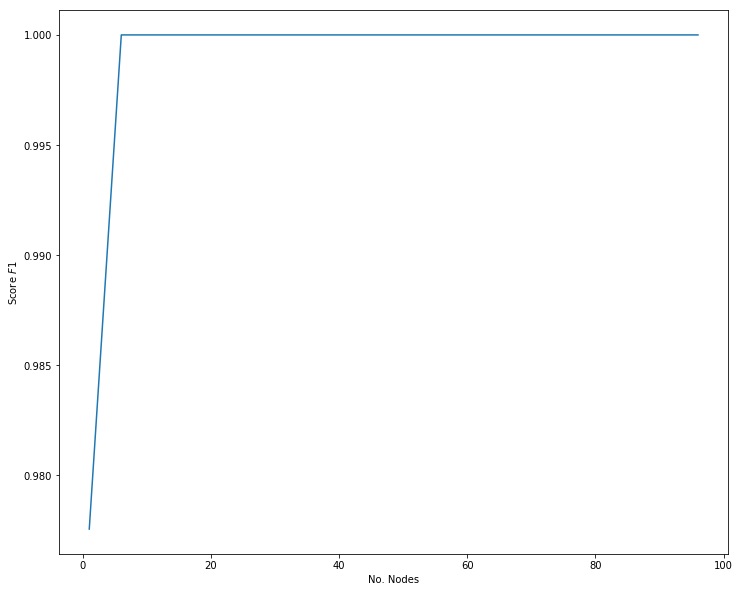

In [5]:
def nodesVSf1(X, y, Xcv,ycv):    
    
    nodes = []
    for i in range(1,100, 5): # 20 values in multiples of 5 from 1 to 100
        nodes.append(i)
    
    f1 = []
    for n in nodes:  # looping through node array 
        
        clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(n), random_state=1) # creating nn with n nodes
        clf.fit(X, y.squeeze())
        yPred = clf.predict(Xcv)        
        f1.append(f1_score(ycv, yPred, average='macro'))
        
    plt.figure(figsize=(12,10))
    plt.plot(nodes, f1) # plotting the f1 score of each nn created to see when the f1 score maximizes

    plt.xlabel('No. Nodes')
    plt.ylabel('Score $ F1$')
    
nodesVSf1(xTrain, yTrain, Xcv, ycv)

## Final optimized model is then created and the train and cv data is fit.

In [11]:
clfNN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15), random_state=1)

#concatinating train and cv sets to train final model on
X = np.vstack([xTrain, Xcv])
y = np.vstack([yTrain,ycv])

clfNN.fit(X, y.squeeze())

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=15, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

## Final model is then used to predict on the cv set of data one last time

A classification report is also printed

In [12]:
cvData = np.genfromtxt('group21_cv.csv')

m = cvData.shape[0]
n = cvData.shape[1]-1 

xcv = cvData[:,0:n]
ycv = cvData[:,n].reshape(m,1)

yPred = clfNN.predict(xcv)

print(classification_report(ycv,yPred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       126
         1.0       1.00      1.00      1.00       100

   micro avg       1.00      1.00      1.00       226
   macro avg       1.00      1.00      1.00       226
weighted avg       1.00      1.00      1.00       226



In [13]:
%store clfNN

Stored 'clfNN' (MLPClassifier)
